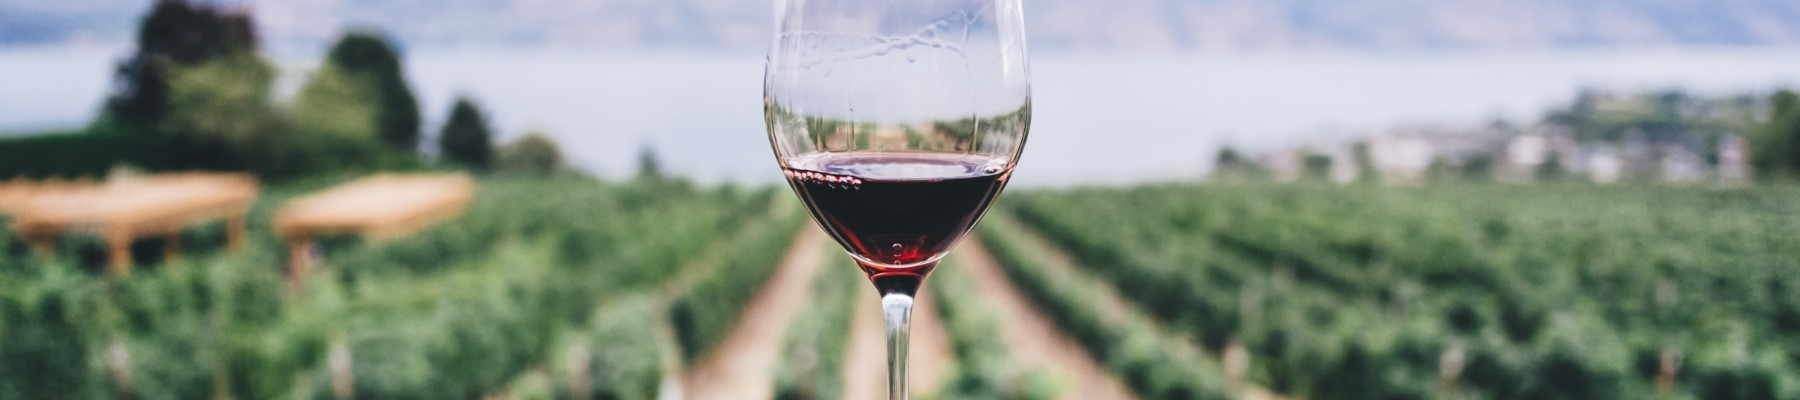
# <h1 align="center"> Tarea 1 - Joaquín Arhancet, Daniel Belderrain, Santiago Nalerio

### <font color='crimson'><h1 align="center"><ins>Red Wine Quality</ins>

https://www.kaggle.com/code/harshjain123/red-wine-quality-exploratory-data-analysis

In [206]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [207]:
df = pd.read_csv('winequality-red.csv')

# Tabla de contenidos
 - [Data Exploration](#lower)
 - [Modelo de Regresión Lineal](#remove)
 - [Modelos de Clasificación](#stop)
 - [K-Nearest Neighbors](#stemming)
 - [Comentarios Finales](#lemmatisation)

# <font color='crimson'> 1. Data Exploration:  <a id='lower'></a>

In [208]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [209]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [211]:
df.shape

(1599, 12)

- El dataset provisto presenta 12 columnas y 1599 instancias primarias (11 variables de decisión y una variable objetivo). Las mismas son: Fixed acidity, Volatile acidity, Citric acid, Residual sugar, Free sulfur dioxide, Total sulfur dioxide, Density, pH, Sulphates, Alcohol y Quality. Estas variables son cuantitativas, y se pueden clasificar en dos grupos:

- Continuas:
  Fixed acidity, Volatile acidity, Citric acid, Residual sugar, Chlorides, Free sulfur dioxide, Total sulfur dioxide, Density, pH,      Sulphates, Alcohol.

- Discretas:
  Quality.

- Analizaremos cada columna, buscando posibles data quality issues (missing values, outliers, irregular cardinality). Para esto, visualizaremos la distribucion de las diferentes caracteristicas mediante graficas y con el data quality report.

# Descripción de las variables

- **Fixed Acidity**: concentración de los ácidos en el vino.
- **Volatile Acidity**: cantidad de ácido acético en el vino.
- **Citric Acid**: encontrado en pequeñas cantidades, el ácido cítrico puede agregar 'frescura' y sabor a los vinos.
- **Residual Sugar**: cantidad de azúcar que queda después de que se detiene la fermentación.
- **Chlorides**: cantidad de sal en el vino.
- **Free Sulfur Dioxide**: la porción de SO2 que está en el vino más la porción que está relacionada a otras sustancias químicas.
- **Total Sulfur Dioxide**: cantidad de formas libres y ligadas de S02.
- **Density**: la densidad del agua es cercana a la del agua dependiendo del porcentaje de contenido de alcohol y azúcar.
- **pH**: describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico).
- **Sulphates**: un aditivo del vino que puede contribuir a los niveles de dióxido de azufre.
- **Alcohol**: el porcentaje de contenido de alcohol del vino.
- **Quality**: calidad del vino (Rango de 1 a 10).

## Fixed Acidity

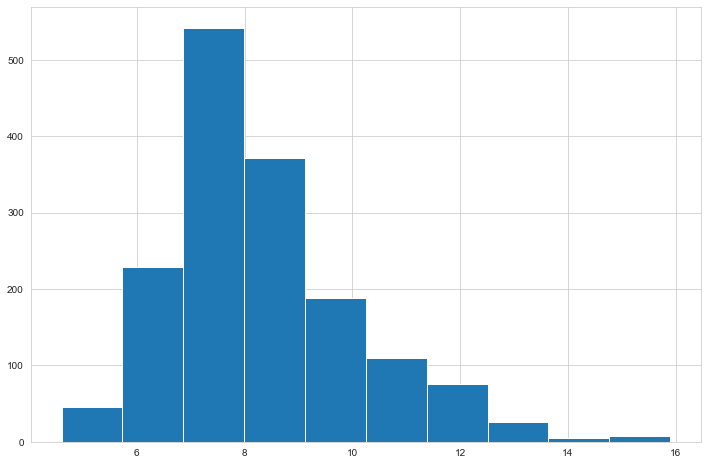

In [212]:
df['fixed acidity'].hist(figsize=(12,8))
display()

In [213]:
# Para Fixed Acidity, se presenta una distribución normal y tiene una leve asimetría positiva. 
# No identificamos data quality issues.

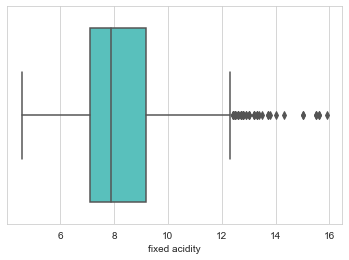

In [214]:
sns.boxplot(x = df['fixed acidity'], color = 'mediumturquoise')
display()

## Volatile Acidity

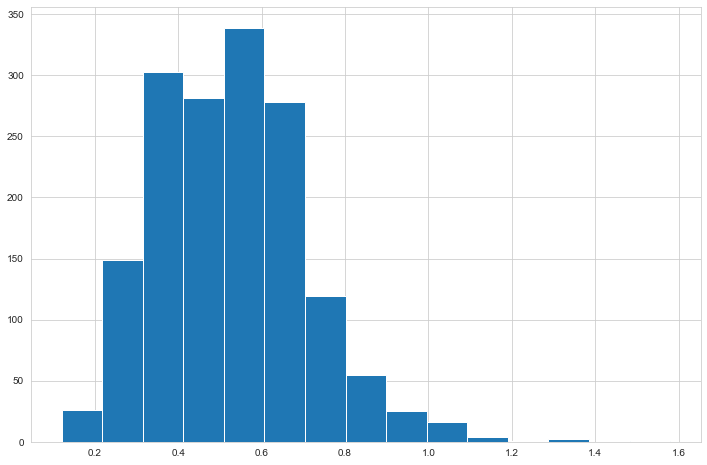

In [215]:
df['volatile acidity'].hist(figsize=(12,8), bins = 15)
display()

In [216]:
# Para Volatile Acidity, se presenta una distribución uniforme y tiene una leve asimetría positiva.
# Al ver la gráfica con 15 bins, se aprecia mejor la distribución. No así como se muestra por defecto.
# No identificamos data quality issues.

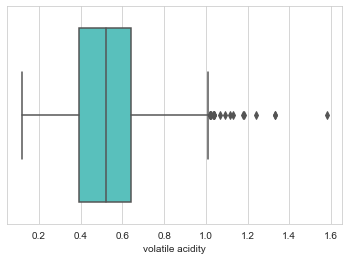

In [217]:
sns.boxplot(x = df['volatile acidity'], color = 'mediumturquoise')
display()

## Citric Acid

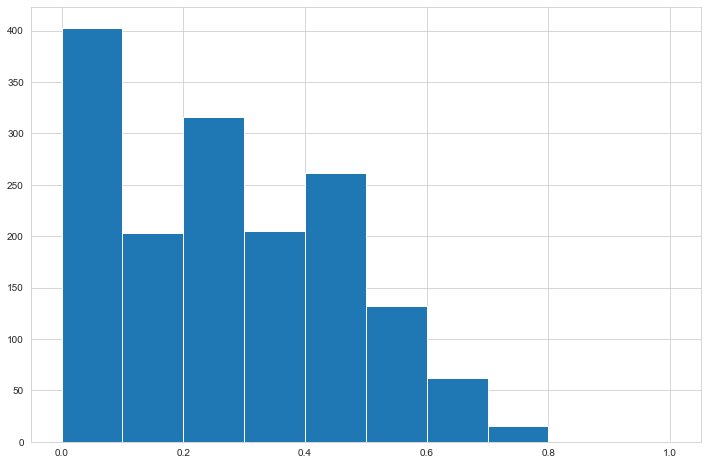

In [218]:
df['citric acid'].hist(figsize=(12,8))
display()

In [219]:
# Para Citric Acid, se presenta una distribución multimodal y tiene asimetría positiva. 
# No identificamos data quality issues.

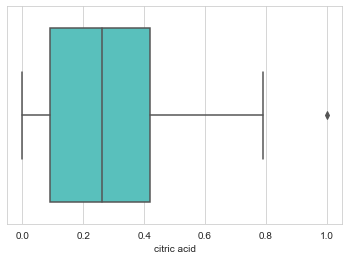

In [220]:
sns.boxplot(x = df['citric acid'], color = 'mediumturquoise')
display()

## Residual Sugar

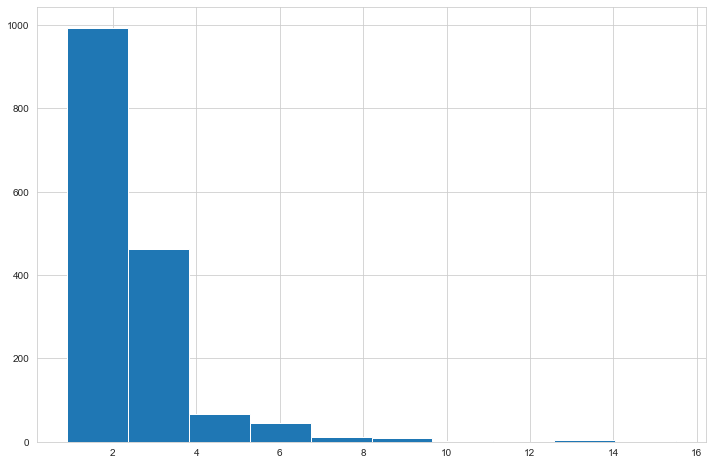

In [221]:
df['residual sugar'].hist(figsize=(12,8))
display()

In [222]:
## Para Residual Sugar, se presenta una distribución unimodal y tiene una fuerte asimetría positiva. 
# No identificamos data quality issues.

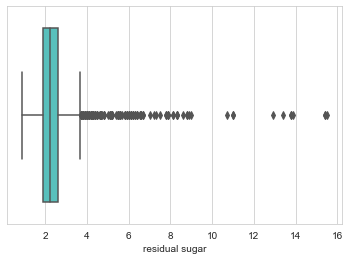

In [223]:
sns.boxplot(x = df['residual sugar'], color = 'mediumturquoise')
display()

## Chlorides

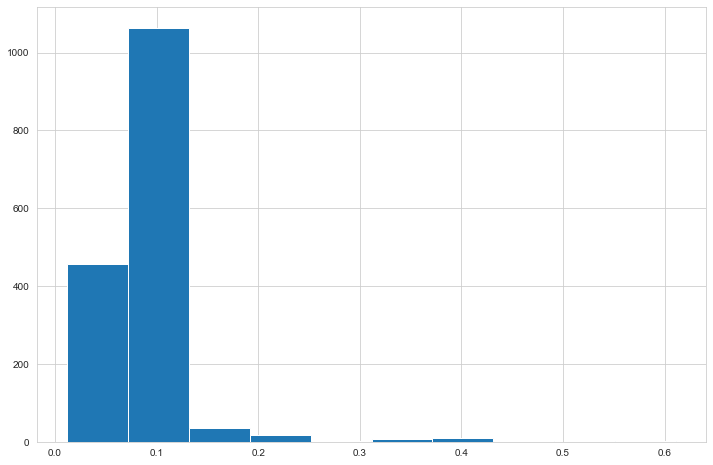

In [224]:
df['chlorides'].hist(figsize=(12,8))
display()

In [225]:
# Para Chlorides, se presenta una distribución unimodal y tiene asimetría positiva. 
# No identificamos data quality issues.

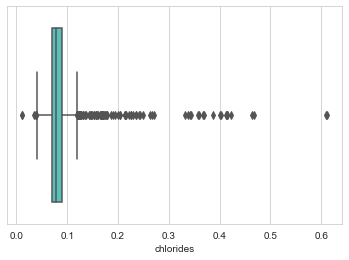

In [226]:
sns.boxplot(x = df['chlorides'], color = 'mediumturquoise')
display()

## Free Sulfur Dioxide

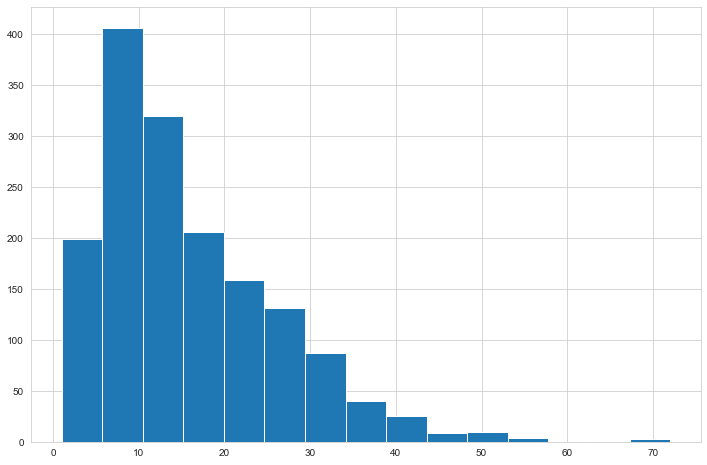

In [227]:
df['free sulfur dioxide'].hist(figsize=(12,8), bins = 15)
display()

In [228]:
# Para Free Sulfur Dioxide, se presenta una distribución unimodal y tiene asimetría positiva. 
# No identificamos data quality issues.

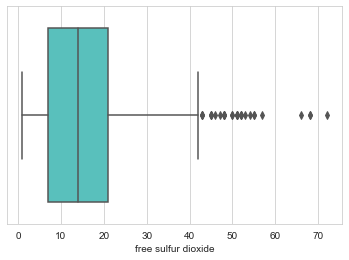

In [229]:
sns.boxplot(x = df['free sulfur dioxide'], color = 'mediumturquoise')
display()

## Total Sulfur Dioxide

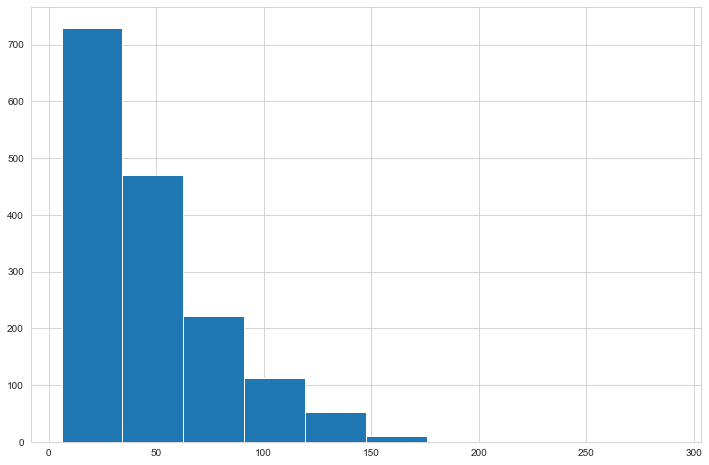

In [230]:
df['total sulfur dioxide'].hist(figsize=(12,8))
display()

In [231]:
# Para Total Sulfur Dioxide, se presenta una distribución unimodal y tiene asimetría positiva. 
# No identificamos data quality issues.

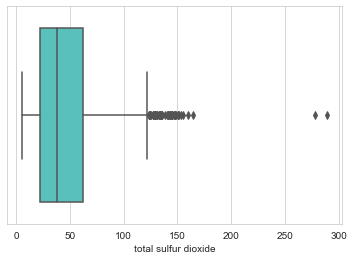

In [232]:
sns.boxplot(x = df['total sulfur dioxide'], color = 'mediumturquoise')
display()

## Density

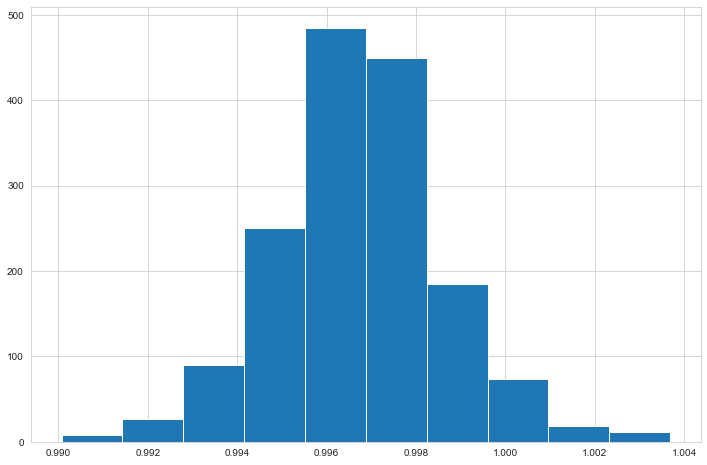

In [233]:
df['density'].hist(figsize=(12,8))
display()

In [234]:
# Para Density, se presenta una distribución normal. 
# No identificamos data quality issues.

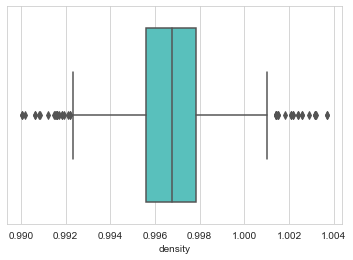

In [235]:
sns.boxplot(x = df['density'], color = 'mediumturquoise')
display()

## PH

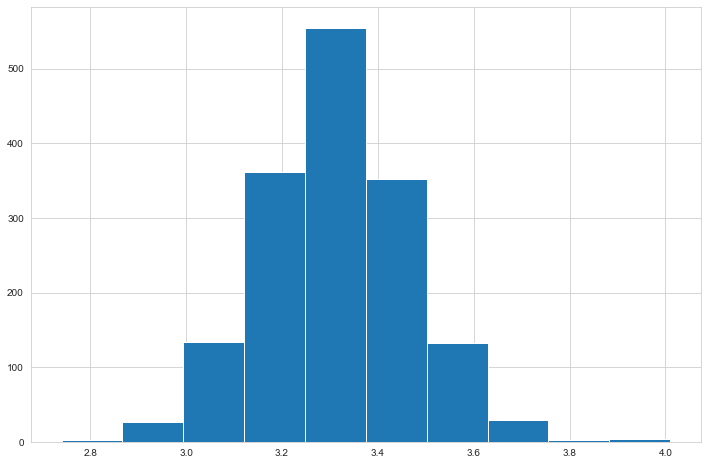

In [236]:
df['pH'].hist(figsize=(12,8))
display()

In [237]:
# Para PH, se presenta una distribución normal. 
# No identificamos data quality issues.

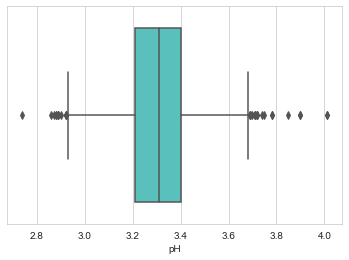

In [238]:
sns.boxplot(x = df['pH'], color = 'mediumturquoise')
display()

## Sulphates

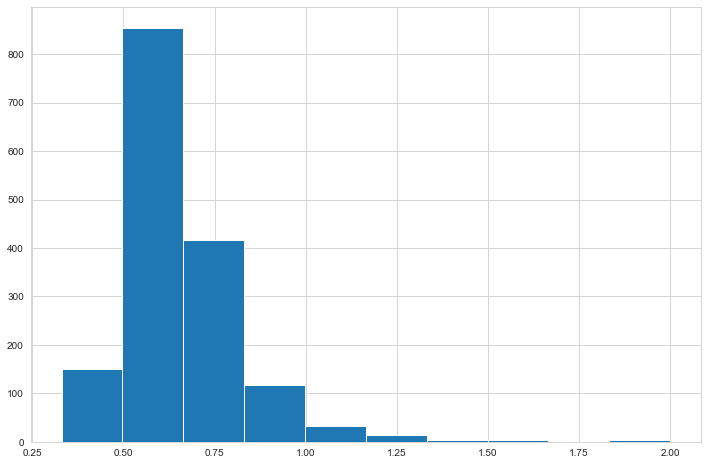

In [239]:
df['sulphates'].hist(figsize=(12,8))
display()

In [240]:
# Para Sulphates, se presenta una distribución unimodal y tiene asimetría positiva. 
# No identificamos data quality issues.

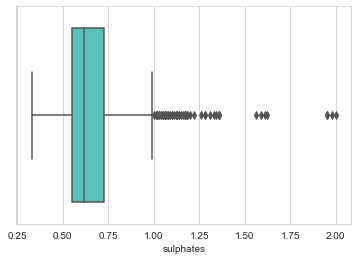

In [241]:
sns.boxplot(x = df['sulphates'], color = 'mediumturquoise')
display()

## Alcohol

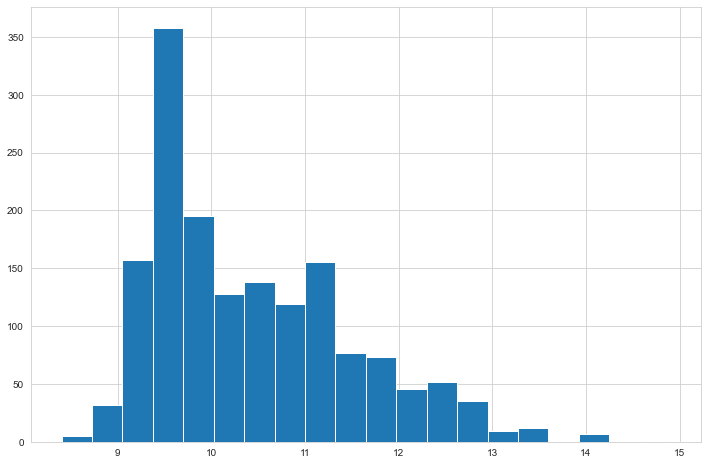

In [242]:
df['alcohol'].hist(figsize=(12,8), bins = 20)
display()

In [243]:
# Para Alcohol, se presenta una distribución unimodal con un posible indicio de multimodal, y tiene asimetría positiva. 
# No identificamos data quality issues.

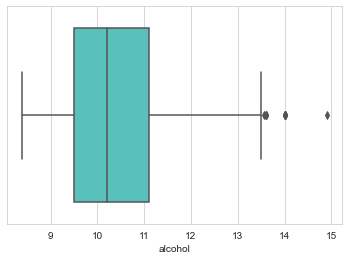

In [244]:
sns.boxplot(x = df['alcohol'], color = 'mediumturquoise')
display()

## Quality

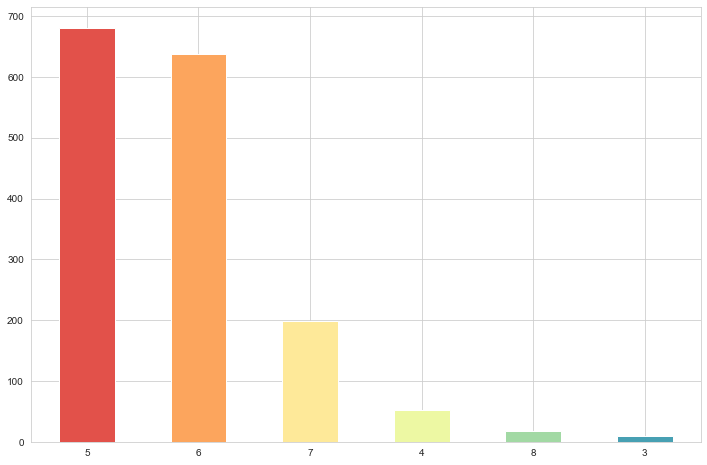

In [245]:
palette = sns.color_palette("Spectral")

df['quality'].value_counts().plot(kind='bar',figsize=(12,8),color = palette)
plt.xticks(rotation=0)
display()

In [246]:
# A la variable quality la tomamos como nuestra target feature. 
# Además, no presenta ninguna quality issue.

## CORRELACIONES ENTRE VARIABLES

In [247]:
df.corr()

#Con este comando vemos la matriz de correlaciones entre las variables. 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<Figure size 432x288 with 0 Axes>

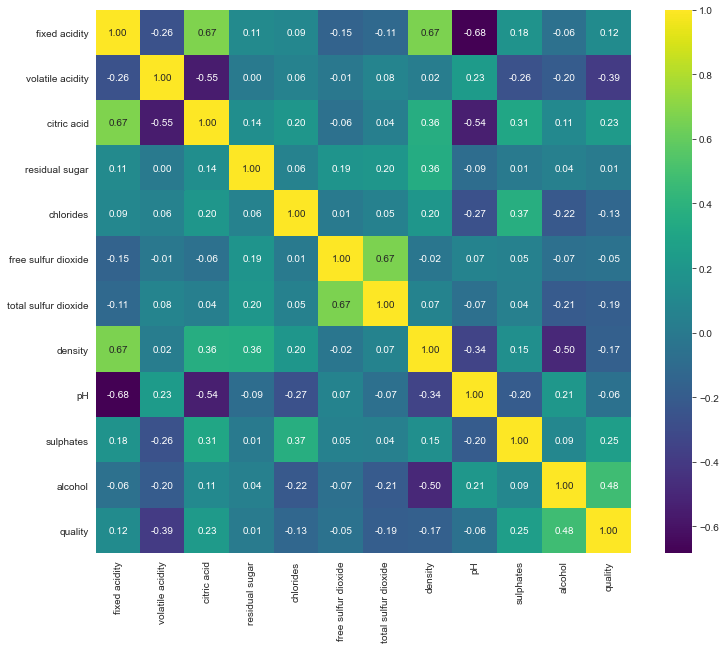

In [248]:
plt.figure() 
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap = 'viridis')
display()

En la matriz de correlacion podemos hacer un analisis mas especifico y exhaustivo sobre nuestro DataFrame. Primero podemos resaltar la presencia de 3 principales variables que tienen mayor "Fuerza" (Correlacion) con la variable objetivo "quality". Estas variables son "volatile acidity" la cual tiene una relacion negativa con la "quality" del vino, esto quiere decir que a mayor "volatile acidity" menor "quality" del vino y viceversa. Luego podemos nombrar a la variable "sulphates" la cual tiene una correlacion positiva con la variable "quality", por lo que a mayor "sulphates" mayor la "quality", algo parecido sucede con la variable "alcohol" pero con inclusive mayor correlacion.

Tambien podemos observar que existe fuertes correlaciones entre algunas variables lo cual luego nos puede llevar a realizar un analisis de correlacion entre estas variables juntas y nuestra variable objetivo "quality". Un ejemplo de esto pueden ser algunas variables de acides como lo son "fixed acidity" y "pH" lo cual tiene sentido ya que a mayor nivel de "fixed acidity" menor es el nivel de "pH" en el vino. Otra correlacion interesante puede ser la densidad del vino con la cantidad de alcohol que este contiene, ya que como podemos ver a mayor cantidad de "alcohol" menor "density" en el vino.

Todas estas cuestiones y muchas otras van a ser analizadas y utilizadas para poder generar mayor valor al trabajo y mejorar nuestros modelos y predicciones.

#### Observación interesante  de correlación entre la variable objetivo y las de desición:
#### Quality:
- Alcohol=0.48
- Sulphates= 0.25
- Citic acid= 0.23
- Volatile acidity= -0.39

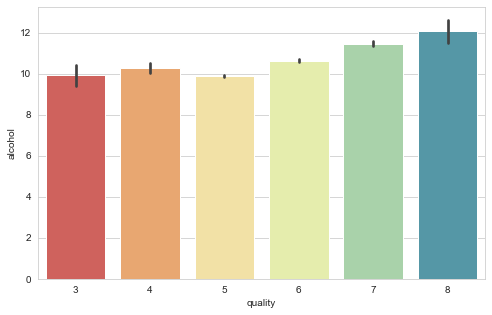

In [249]:
fig = plt.figure(figsize = (8,5))
sns.barplot(df['quality'], df['alcohol'], palette = 'Spectral')
display()

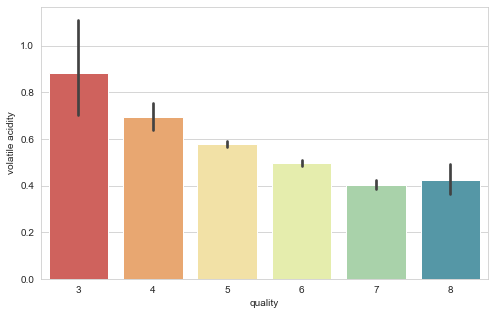

In [250]:
fig = plt.figure(figsize = (8,5))
sns.barplot(df['quality'],df['volatile acidity'],palette = 'Spectral')
display()

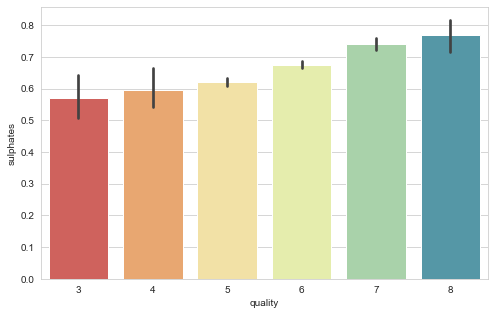

In [251]:
fig = plt.figure(figsize = (8,5))
sns.barplot(df['quality'], df['sulphates'],palette = 'Spectral')
display()

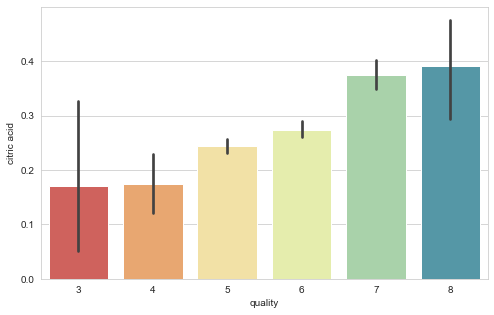

In [252]:
fig = plt.figure(figsize = (8,5))
sns.barplot(df['quality'], df['citric acid'], palette = 'Spectral')
display()

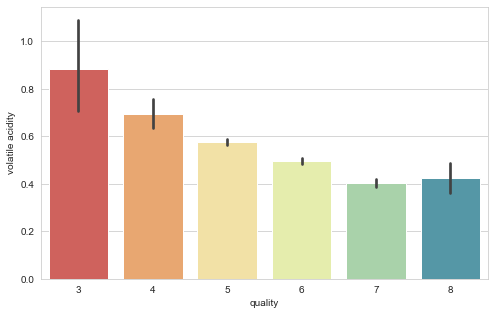

In [253]:
fig = plt.figure(figsize = (8,5))
sns.barplot(df['quality'], df['volatile acidity'], palette = 'Spectral')
display()

Sabiendo que la categoría quality va de 1 a 10, decidimos que:
- Los vinos de categoría 1 y 2  son considerados como muy malos
- Los vinos de categoría 3 y 4  son considerados como malos
- Los vinos de categoría 5 y 6  son considerados como aceptables
- Los vinos de categoría 7 y 8  son considerados como buenos
- Los vinos de categoría 9 y 10  son considerados como muy buenos

In [254]:
(df['quality']==1).value_counts()

False    1599
Name: quality, dtype: int64

In [255]:
(df['quality']==2).value_counts()

False    1599
Name: quality, dtype: int64

### No hay vinos de muy mala calidad en el dataset

In [256]:
(df['quality']==3).value_counts()
# Hay 10 vinos en el dataset que tienen una calidad 3

False    1589
True       10
Name: quality, dtype: int64

In [257]:
(df['quality']==4).value_counts()
# Hay 53 vinos en el dataset que tienen una calidad 4

False    1546
True       53
Name: quality, dtype: int64

In [258]:
mala=((df['quality']==3).sum()+(df['quality']==4).sum())
mala

63

### Hay 63 vinos de mala calidad en el dataset

In [259]:
(df['quality']==5).value_counts()
# Hay 681 vinos en el dataset que tienen una calidad 5

False    918
True     681
Name: quality, dtype: int64

In [260]:
(df['quality']==6).value_counts()
# Hay 638 vinos en el dataset que tienen una calidad 6

False    961
True     638
Name: quality, dtype: int64

In [261]:
aceptable=((df['quality']==5).sum()+(df['quality']==6).sum())
aceptable

1319

### Hay 1319 vinos de calidad aceptable en el dataset

In [262]:
(df['quality']==7).value_counts()
# Hay 199 vinos en el dataset que tienen una calidad 7

False    1400
True      199
Name: quality, dtype: int64

In [263]:
(df['quality']==8).value_counts()
# Hay 18 vinos en el dataset que tienen una calidad 8

False    1581
True       18
Name: quality, dtype: int64

In [264]:
buena=((df['quality']==7).sum()+(df['quality']==8).sum())
buena

217

### Hay 217 vinos de buena calidad en el dataset

In [265]:
(df['quality']==9).value_counts()
# No hay vinos en el dataset que tengan una calidad  de 9

False    1599
Name: quality, dtype: int64

In [266]:
(df['quality']==10).value_counts()
# No hay vinos en el dataset que tengan una calidad  de 10

False    1599
Name: quality, dtype: int64

### No hay 63 vinos de mala calidad en el dataset

Decidimos separar el dataset original en base a la calidad

In [267]:
filtro_1=[3,4]
filtro_2=[5,6]
filtro_3=[7,8]

df_mala=df[['volatile acidity','alcohol','sulphates','citric acid','quality']]
df_acep=df[['volatile acidity','alcohol','sulphates','citric acid','quality']]
df_buena=df[['volatile acidity','alcohol','sulphates','citric acid','quality']]

df_mala=df_mala[df_mala.quality.isin(filtro_1)]
df_acep=df_acep[df_acep.quality.isin(filtro_2)]
df_buena=df_buena[df_buena.quality.isin(filtro_3)]

In [268]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualización de la distribución de los datos de las variables más influyentes sobre la calidad del vino

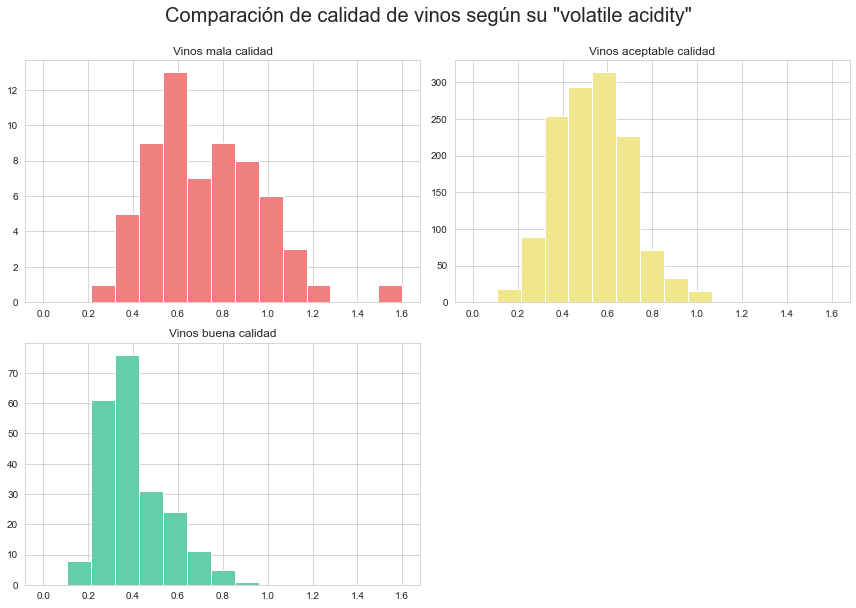

In [269]:
fig = plt.figure(figsize=(12,8))

plt.suptitle('Comparación de calidad de vinos según su "volatile acidity"',fontsize=20,y=1.05)


ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)


ax1.hist(df_mala['volatile acidity'],range=(0,1.6),bins=15, color = 'lightcoral')
ax2.hist(df_acep['volatile acidity'],range=(0,1.6),bins=15, color = 'khaki')
ax3.hist(df_buena['volatile acidity'],range=(0,1.6),bins=15, color = 'mediumaquamarine')

ax1.set_title('Vinos mala calidad')
ax2.set_title('Vinos aceptable calidad')
ax3.set_title('Vinos buena calidad')

fig.tight_layout()

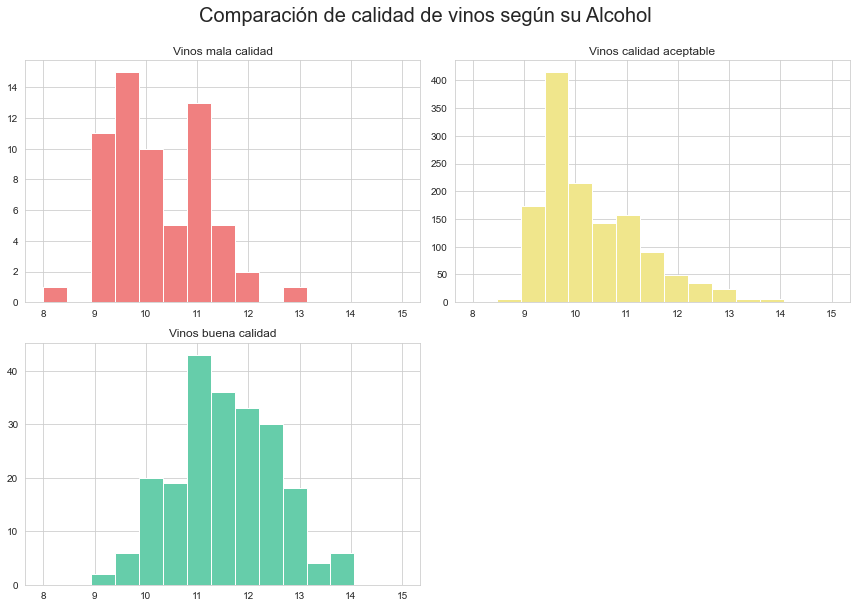

In [270]:
fig = plt.figure(figsize=(12,8))

plt.suptitle('Comparación de calidad de vinos según su Alcohol ',fontsize=20,y=1.05)


ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)


ax1.hist(df_mala['alcohol'], range=(8,15),bins=15, color = 'lightcoral')
ax2.hist(df_acep['alcohol'], range=(8,15),bins=15, color = 'khaki')
ax3.hist(df_buena['alcohol'], range=(8,15),bins=15, color = 'mediumaquamarine')

ax1.set_title('Vinos mala calidad')
ax2.set_title('Vinos calidad aceptable')
ax3.set_title('Vinos buena calidad')

fig.tight_layout()

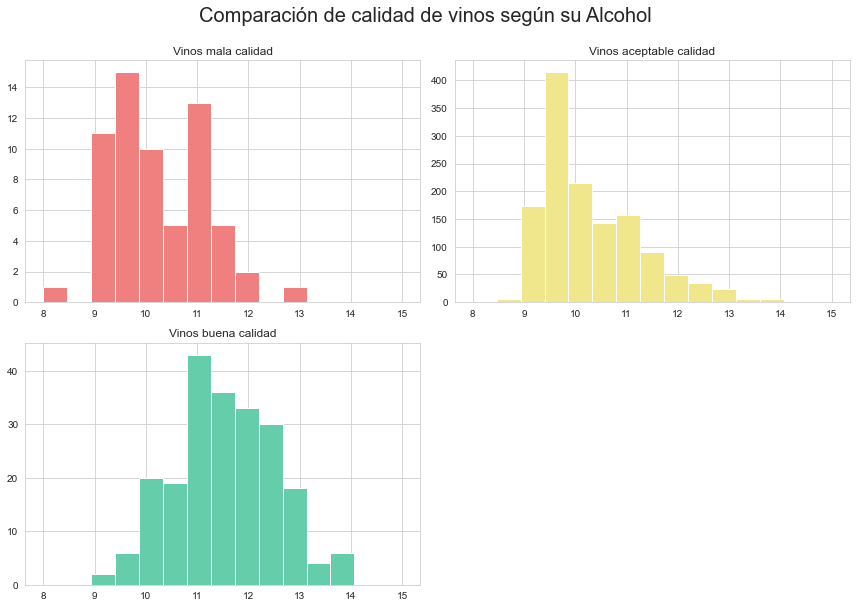

In [271]:
fig = plt.figure(figsize=(12,8))

plt.suptitle('Comparación de calidad de vinos según su Alcohol ',fontsize=20,y=1.05)


ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)


ax1.hist(df_mala['alcohol'], range=(8,15),bins=15, color = 'lightcoral')
ax2.hist(df_acep['alcohol'], range=(8,15),bins=15, color = 'khaki')
ax3.hist(df_buena['alcohol'], range=(8,15),bins=15, color = 'mediumaquamarine')

ax1.set_title('Vinos mala calidad')
ax2.set_title('Vinos aceptable calidad')
ax3.set_title('Vinos buena calidad')

fig.tight_layout()

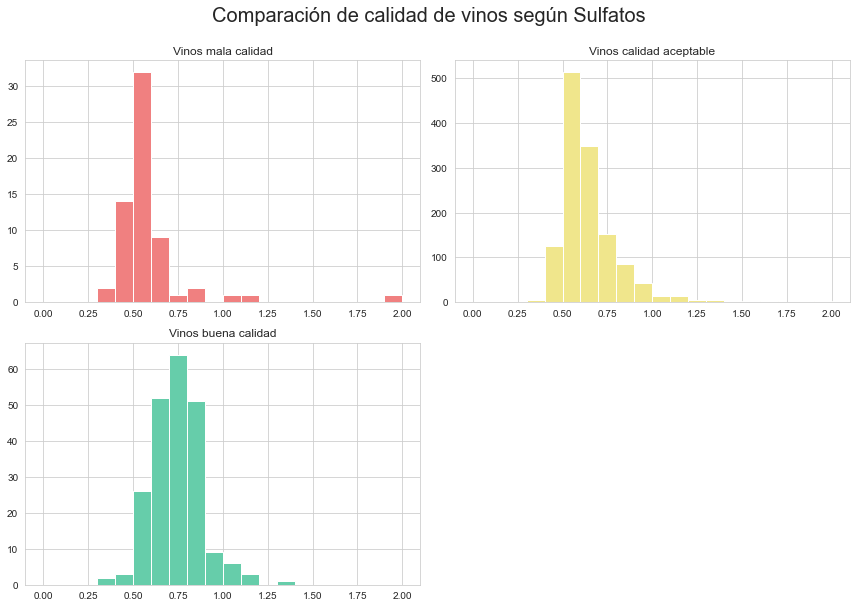

In [272]:
fig = plt.figure(figsize=(12,8))

plt.suptitle('Comparación de calidad de vinos según Sulfatos',fontsize=20,y=1.05)


ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)


ax1.hist(df_mala['sulphates'],range=(0,2),bins=20, color = 'lightcoral')
ax2.hist(df_acep['sulphates'],range=(0,2),bins=20, color = 'khaki')
ax3.hist(df_buena['sulphates'],range=(0,2),bins=20, color = 'mediumaquamarine')

ax1.set_title('Vinos mala calidad')
ax2.set_title('Vinos calidad aceptable')
ax3.set_title('Vinos buena calidad')

fig.tight_layout()

# <font color='crimson'> 2. Modelo de Regresión Lineal <a id='remove'></a>

In [273]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [274]:
xreg= df.drop('quality', axis = 1)
yreg= df['quality']

In [275]:
x_train, x_test, y_train, y_test = train_test_split(xreg, yreg, test_size =0.20, random_state = 3)

In [276]:
modelo1 = LinearRegression().fit(x_train,y_train)

y_pred = modelo1.predict(x_test)

In [277]:
mean_absolute_error(y_test,y_pred)

0.467849324065722

In [278]:
math.sqrt(mean_squared_error(y_test,y_pred))

0.6052280007453976

- Existen numerosas maneras de evaluar nuestros modelos. La evaluación siempre se mide por medio de métricas. Éstas son fórmulas matemáticas con fines específicos que intentan expresar una característica del modelo. Por ejemplo, una métrica muy utilizada es Mean Absolute Error (MAE). Ésta mide la diferencia absoluta entre nuestra predicción y el valor real, en sí es una medida de precisión:


- Otra métrica muy utilizada es Root Mean Squared Error (RMSE). Al igual que MAE, es una medida de precisión, pero ésta penaliza más fuertemente los errores más grandes.


- El MAE nos dio 0.467. Consideramos que este resultado es bueno ya es bastante cercano a 0


- El RMSE nos dio 0.605. Comparado con el MAE, este castiga más los errores más grandes. Cómo la diferencia con la métrica anterior es de 0,1373 consideramos que las méticas calculadas han arrojado resultados positivos.


- Para mejorar las métricas se nos ocurrieron las siguientes ideas: 1- Bajar las cantidad de datos que se manejan en la regresión. 2- Ajustar el tamaño del subdataset de prueba:la mejor medida encontada hasta el momento es de 78% de los datos para el  dataset de entrenamiento y 22% de los datos para el dataset de testing.

### Modelo de Regresión Lineal utilizando las variables con mayor relación positiva con quality

In [279]:
variables_positivas = ['alcohol', 'sulphates','citric acid']

xreg2 = df[variables_positivas]
yreg2 = df['quality']

In [280]:
x_train, x_test, y_train, y_test = train_test_split(xreg2, yreg2, test_size =0.20, random_state = 3)

In [281]:
modelo2 = LinearRegression().fit(x_train,y_train)

y_pred2 = modelo2.predict(x_test)

In [282]:
mean_absolute_error(y_test,y_pred2)

0.5202142859089036

In [283]:
math.sqrt(mean_squared_error(y_test,y_pred2))

0.6566672396014274

In [284]:
# EL modelo a pesar de utilizar sólo las variables con mayor correlación, emperó en sus predicciones

### Modelo de Regresión Lineal utilizando las variables con mayor relación negativa con quality

In [285]:
variables_negativas = ['volatile acidity', 'total sulfur dioxide','density']

xreg3 = df[variables_negativas]
yreg3 = df['quality']

In [286]:
x_train, x_test, y_train, y_test = train_test_split(xreg3, yreg3, test_size =0.20, random_state = 3)

In [287]:
modelo3 = LinearRegression().fit(x_train,y_train)

y_pred3 = modelo3.predict(x_test)

In [288]:
mean_absolute_error(y_test,y_pred3)

0.5363253251685276

In [289]:
math.sqrt(mean_squared_error(y_test,y_pred3))

0.6756685130458491

In [290]:
# El modelo a pesar de utilizar sólo las variables con menor correlación, emperó en sus predicciones

# <font color='crimson'> 3. Modelos de Clasificación <a id='stop'></a>

Los modelos seleccionados para la clasificación son los siguientes:
- [Regresión Logística](#reglog)
- [Naive Bayes](#naive)
- [Decision Tree](#tree)
- [Random Forest](#forest)

In [291]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,confusion_matrix, classification_report

In [292]:
df['quality'] = np.where(df['quality'] > 5, 1, 0)
df['quality'].value_counts()

# Si la calidad es menor o igual a 6 entonces será de calidad Mala
# Si la calidad es menor o igual a 6 entonces será de calidad Buena
# 1 = Bueno 
# 0 = Malo

1    855
0    744
Name: quality, dtype: int64

In [293]:
x = df.drop('quality', axis = 1)
y = df['quality']

### 1. Regresion Logistica <a id='reglog'></a>

In [294]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [295]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [296]:
modelo4 = LogisticRegression()
modelo4.fit(x_train, y_train)
modelo4_pred = modelo4.predict(x_test)

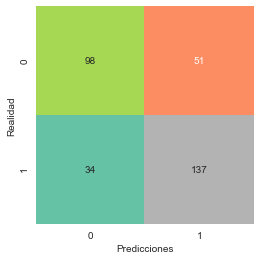

In [297]:
matriz4 = confusion_matrix(y_test, modelo4_pred)
sns.heatmap(matriz4.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [298]:
print(classification_report(y_test, modelo4_pred))

              precision    recall  f1-score   support

           0       0.66      0.74      0.70       132
           1       0.80      0.73      0.76       188

    accuracy                           0.73       320
   macro avg       0.73      0.74      0.73       320
weighted avg       0.74      0.73      0.74       320



In [299]:
modelo4_pred_proba = modelo4.predict_proba(x_test)
x_test['probability'] = modelo4_pred_proba.T[1]

In [300]:
print(roc_auc_score(y_test, modelo4_pred))

0.7355738233397807


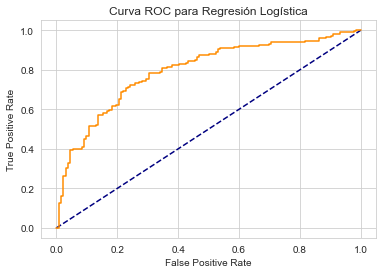

In [301]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo4_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Regresión Logística')
display()

### Modelo de Regresión Logística utilizando las variables con mayor relación positiva con quality

In [302]:
variables_positivas = ['alcohol', 'sulphates','citric acid']

xlog2 = df[variables_positivas]
ylog2 = df['quality']

In [303]:
x_train, x_test, y_train, y_test = train_test_split(xlog2, ylog2, test_size =0.20, random_state = 2)

In [304]:
modelo5 = LogisticRegression()
modelo5.fit(x_train, y_train)
modelo5_pred = modelo5.predict(x_test)

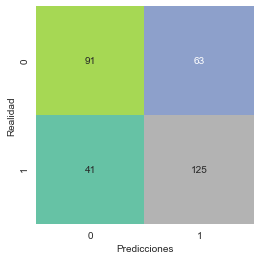

In [305]:
matriz5 = confusion_matrix(y_test, modelo5_pred)
sns.heatmap(matriz5.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [306]:
print(classification_report(y_test, modelo5_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       132
           1       0.75      0.66      0.71       188

    accuracy                           0.68       320
   macro avg       0.67      0.68      0.67       320
weighted avg       0.69      0.68      0.68       320



In [307]:
modelo5_pred_proba = modelo5.predict_proba(x_test)
x_test['probability'] = modelo5_pred_proba.T[1]

In [308]:
print(roc_auc_score(y_test, modelo5_pred))

0.6771437782076081


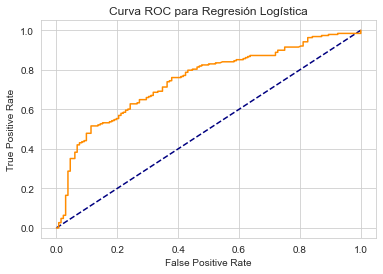

In [309]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo5_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Regresión Logística')
display()

### Modelo de Regresión Logística utilizando las variables con mayor relación negativa con quality

In [310]:
variables_negativas = ['volatile acidity', 'total sulfur dioxide','density']

xlog3 = df[variables_negativas]
ylog3 = df['quality']

In [311]:
x_train, x_test, y_train, y_test = train_test_split(xlog3, ylog3, test_size =0.20, random_state = 2)

In [312]:
modelo6 = LogisticRegression()
modelo6.fit(x_train, y_train)
modelo6_pred = modelo6.predict(x_test)

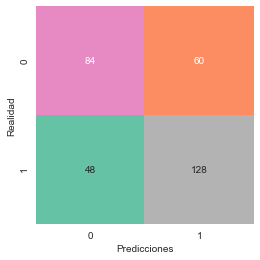

In [313]:
matriz6 = confusion_matrix(y_test, modelo6_pred)
sns.heatmap(matriz6.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [314]:
print(classification_report(y_test, modelo6_pred))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61       132
           1       0.73      0.68      0.70       188

    accuracy                           0.66       320
   macro avg       0.66      0.66      0.66       320
weighted avg       0.67      0.66      0.66       320



In [315]:
modelo6_pred_proba = modelo6.predict_proba(x_test)
x_test['probability'] = modelo6_pred_proba.T[1]

In [316]:
print(roc_auc_score(y_test, modelo6_pred))

0.6586073500967118


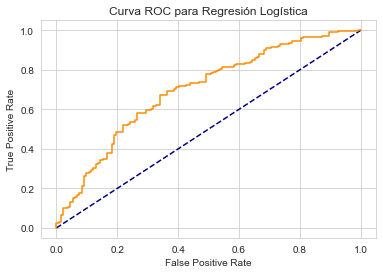

In [317]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo6_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Regresión Logística')
display()

### 2. Naive Bayes <a id='naive'></a>

In [318]:
from sklearn.naive_bayes import GaussianNB

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.20, random_state = 5)

In [320]:
modelo7 = GaussianNB()
modelo7.fit(x_train, y_train)
modelo7_pred = modelo7.predict(x_test)

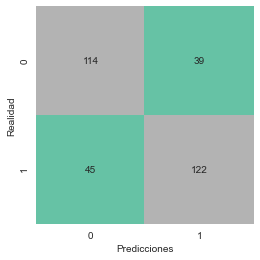

In [321]:
matriz7 = confusion_matrix(y_test, modelo7_pred)
sns.heatmap(matriz7.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [322]:
print(classification_report(y_test, modelo7_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       159
           1       0.73      0.76      0.74       161

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [323]:
modelo7_pred_proba = modelo7.predict_proba(x_test)
x_test['probability'] = modelo7_pred_proba.T[1]

In [324]:
print(roc_auc_score(y_test, modelo7_pred))

0.7373725536153757


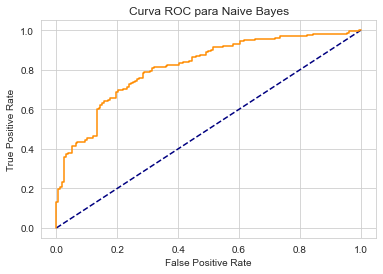

In [325]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo7_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Naive Bayes')
display()

### Modelo de Naive Bayes utilizando las variables con mayor relación positiva con quality

In [326]:
variables_positivas = ['alcohol', 'sulphates','citric acid']

xbayes2 = df[variables_positivas]
ybayes2 = df['quality']

In [327]:
x_train, x_test, y_train, y_test = train_test_split(xbayes2, ybayes2, test_size =0.20, random_state = 5)

In [328]:
modelo8 = GaussianNB()
modelo8.fit(x_train, y_train)
modelo8_pred = modelo8.predict(x_test)

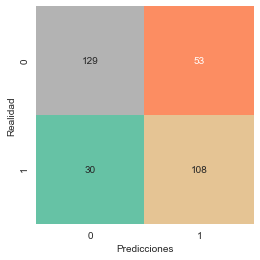

In [329]:
matriz8 = confusion_matrix(y_test, modelo8_pred)
sns.heatmap(matriz8.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [330]:
print(classification_report(y_test, modelo8_pred))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       159
           1       0.78      0.67      0.72       161

    accuracy                           0.74       320
   macro avg       0.75      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



In [331]:
modelo8_pred_proba = modelo8.predict_proba(x_test)
x_test['probability'] = modelo8_pred_proba.T[1]

In [332]:
print(roc_auc_score(y_test, modelo8_pred))

0.7410641040665651


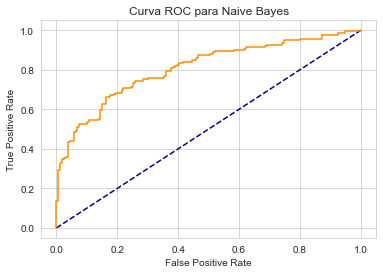

In [333]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo8_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Naive Bayes')
display()

### Modelo de Naive Bayes utilizando las variables con mayor relación negativa con quality

In [334]:
variables_negativas = ['volatile acidity', 'total sulfur dioxide','density']

xbayes3 = df[variables_negativas]
ybayes3 = df['quality']

In [335]:
x_train, x_test, y_train, y_test = train_test_split(xbayes3, ybayes3, test_size =0.20, random_state = 5)

In [336]:
modelo9 = GaussianNB()
modelo9.fit(x_train, y_train)
modelo9_pred = modelo9.predict(x_test)

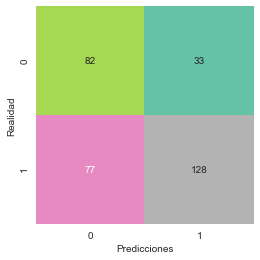

In [337]:
matriz9 = confusion_matrix(y_test, modelo9_pred)
sns.heatmap(matriz9.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [338]:
print(classification_report(y_test, modelo9_pred))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60       159
           1       0.62      0.80      0.70       161

    accuracy                           0.66       320
   macro avg       0.67      0.66      0.65       320
weighted avg       0.67      0.66      0.65       320



In [339]:
modelo9_pred_proba = modelo9.predict_proba(x_test)
x_test['probability'] = modelo9_pred_proba.T[1]

In [340]:
print(roc_auc_score(y_test, modelo9_pred))

0.6553771631704364


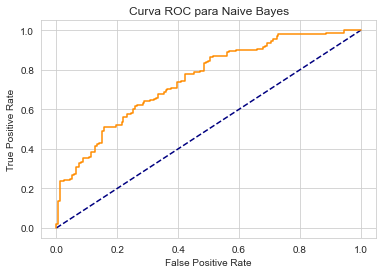

In [341]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo9_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Naive Bayes')
display()

### 3. Decision Trees <a id='tree'></a>

Primero separamos nuestro DataFrame en dos, el objetivo de esto es separar todas nuestras variables de nuestra variable objetivo en este caso "quality". De esta manera obtenemos una X y una Y.

In [342]:
x = df.iloc[:, 0:11]
y = df.iloc[:, 11:12]

Ahora tenemos que dividir nuestros datos en dos partes, una parte de entrenamiento y otra de prueba. Generalmente este split se hace en un 75% u 80% de datos de entrenamiento y un 25% u 20% de prueba. En este caso vamos a hacer un split de 80/20.

In [343]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

Ahora que ya tenemos hecho el split y nuestros diferentes datos de entrenamiento y prueba se encuentran listos, estamos prontos para crear nuestro modelo de arbol de decision.

In [344]:
from sklearn.tree import DecisionTreeClassifier

# En este caso dejamos los parentesis vacíos, pero podemos probar variando "max_depth" lo cual se encarga de regular la
# profundidad del árbol.
modelo10 = DecisionTreeClassifier()

# Entranamos nuestro modelo
modelo10 = modelo10.fit(x_train, y_train)

Vamos a visualizar el arbol de decision creado, solo para ver que se haya creado correctamente, elegimos un max_depth = 2 ya que si tratamos de mostrar todo el arbol no se puede ver bien.

**Explicacion del arbol de decision:**
 * Cada cuadrado es un nodo.
 * La primera linea del cuadrado es la pregunta, tomando como ejemplo el primer nodo (cuadrado) podemos ver que la pregunta es si la variable "alcohol" es menor o igual a 10.35.
 * La segunda linea muestra el indice de gini, este indice nos muestra la "pureza" del nodo, mientras menor sea el indice mas puro es nuestro nodo. La pureza del nodo va mejorando a medida que se va bajando de nivel en el arbol de decision.
 * La tercera linea es la cantidad de datos que cumplen con estas condiciones.
 * La cuarta linea muestra cuantos datos de los mencionados en la linea anterior son de la clase NO o de la clase SI: [NO, SI].
 * La quinta linea refiere a la clase con cantidad predominante de datos, volviendo al caso del primer nodo podemos ver que es la clase SI.

Ahora que ya entrenamos el modelo y mostramos y explicamos el arbol podemos calcular que tan bueno es nuestro arbol para predecir. Para hacer esto vamos a utilizar X_test e Y_test.

In [345]:
modelo10_pred = modelo10.predict(x_test)

Luego creamos la matriz de confusion para poder medir la precision de nuestro modelo. En este paso basicamente lo que hacemos es comparar los valores de Y_test que son los reales con los de Y_prediction los cuales son los predecidos para ver que tan bien el modelo pudo predecir los valores.

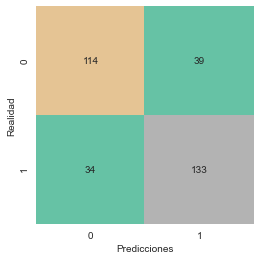

In [346]:
matriz10 = confusion_matrix(y_test, modelo10_pred)
sns.heatmap(matriz10.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

Expliquemos un poco lo que vemos en una matriz de confusion. En el eje "y" tenemos las clases SI y NO reales esto vendria a ser el Y_test, mientras que en el eje "x" tenemos las clases SI y NO predichas esto vendria a ser el Y_prediction.

El cuadrado de la primer fila y primer columna contiene los **"Verdaderos Positivos"** estos datos vienen a ser todos los valores que nuestro modelo predijo como NO y efectivamente son NO. Luego en la primer fila y segunda columna tenemos a los **"Falsos Negativos"** ya que son los valores que nuestro modelo predijo como SI pero en realidad (Y_test) son NO, por lo que se equivoco.

Pasando a la segunda fila y primer columna tenemos a los **"Falsos Positivos"**, estos son los valores que nuestro modelo predijo como NO y en realidad esos valores deberian ser SI (Y_test) y en la segunda columna se encuentran los **"Verdaderos Negativos"** ya que son los valores predichos por nuestro modelo como SI y efectivamente son SI.

En la diagonal de arriba a abajo e izquierda a derecha se encuentran los valores que efectivamente fueron bien predichos y en la diagonal contraria todos los valores que fueron erroneamente predichos.

Acontinuacion vamos a calcular la precision del modelo basandonos en la matriz de confusion creada anteriormente.

In [347]:
print(classification_report(y_test, modelo10_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       148
           1       0.80      0.77      0.78       172

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [348]:
modelo10_pred_proba = modelo10.predict_proba(x_test)
x_test['probability'] = modelo10_pred_proba.T[1]

In [349]:
print(roc_auc_score(y_test, modelo10_pred))

0.7717630421118793


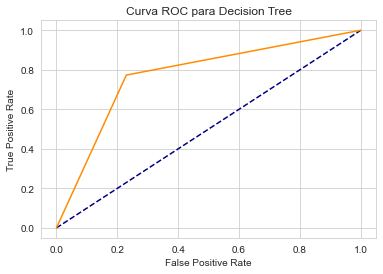

In [350]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo10_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Decision Tree')
display()

### 4. Random Forest <a id='forest'></a>

El algoritmo Random Forest podemos decir que es hermano del Decition Tree ya que el Random Forest se encuentra basado en arboles de decision convirtiendo caracteristicas en nodos de arbol y luego usa la perdida de entropia para hacer predicciones.

En este caso en particular tal vez el Random Forest pueda generar una mejor prediccion con mayor accuracy que el modelo de Decition Tree ya que por medio de la utilizacion de una gran cantidad de arboles el algoritmo puede no solo aprender mejor, sino tambien evitar problemas como el **Overfitting**, lo cual significa ajustar demasiado el modelo al entrenarlo y por lo tanto que el modelo en vez de aprender memoriza y esto genera que no pueda predecir de manera correcta en casos no observados.

El Random Forest al igual que el Decition Tree sirve tanto para la Clasificacion como para la Regresion.

Una "complicacion" en algunos casos de querer crear un modelo Random Forest es que todos nuestros datos deben ser de tipo numerico, por lo que en muchos DataFrames va a ser necesario el uso de tecnicas de  codificacion como por ejemplo **"One-Hot Encoding"** con el uso de .get_dummies().

En nuestro caso no debemos realizar una codificacion porque todas nuestras variables son numericas.

Nuestro primer paso al igual que en la creacion del Decition Tree es separar nuestro DataFrame en dos creando dos DataFrames, el "X" y el "Y".

In [351]:
x = df.iloc[:, 0:11]
y = df.iloc[:, 11:12]

Nuestro segundo paso es hacer una division de los datos en dos conjuntos, uno de entrenamiento y otro de prueba al igual que en la creacion del Decition Tree.

In [352]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.80, random_state = 3)

El paso siguiente es un paso que puede hacerse como no, este paso se trata de la normalizacion de los datos. Que es normalizar datos? Normalizar datos es una tecnica que se utiliza para evitar redundancias e inclinaciones sesgadas en un conjunto de datos. Esto se hace llevando los valores de las columnas a una escala comun, principalmente en columas con rangos variados.

**Ejemplo practico:**
Imaginemonos que tenemos un conjunto de datos que nos muestra la EDAD y el SALARIO de cierto grupo de personas. En este caso tendriamos dos variables numericas lo cual nos ahorra un paso en la creacion de nuestro random forest pero existe una gran diferencia de rangos entre los valores que toma la edad los cuales pueden fluctuar entre 17/65 años y el salario el cual lo tenemos entre 100 y 100.000. Deberiamos normalizar los datos pasando la escala del salario a miles de tal forma que el valor mas alto en este caso seria de 100 lo cual no dista mucho del rango de la variable EDAD.

Volviendo al caso que estamos haciendo en esta tarea vamos a correr y entrenar este modelo dejando los datos como estan y luego normalizandolos, solo para demostrar como hariamos la normalizacion de los datos.

In [353]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()

x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

Ahora que ya tenemos todo listo, proseguimos a entrenar nuestro modelo Random Forest.

In [354]:
from sklearn.ensemble import RandomForestClassifier

modelo11 = RandomForestClassifier(n_estimators=200)
modelo11.fit(x_train, y_train)
modelo11_pred = modelo11.predict(x_test)

Vamos a medir que tan bueno es nuestro modelo con las metricas **MAE** (Mean Absolute Error), **MSE** (Mean Squared Error), **RMSE** (Root Mean Squared Error)

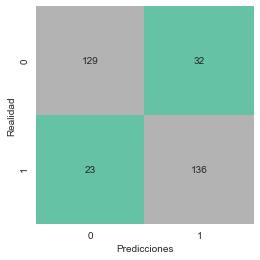

In [355]:
matriz11 = confusion_matrix(y_test, modelo11_pred)
sns.heatmap(matriz11.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [356]:
print(classification_report(y_test, modelo11_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82       152
           1       0.86      0.81      0.83       168

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320



In [357]:
modelo11_pred_proba = modelo11.predict_proba(x_test)

In [358]:
print(roc_auc_score(y_test, modelo11_pred))

0.8291040100250627


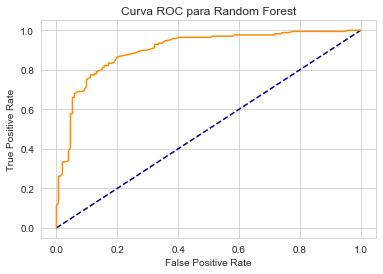

In [359]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo11_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Random Forest')
display()

### Modelo de Random Forest utilizando las variables con mayor relación positiva con quality

In [360]:
variables_positivas = ['alcohol', 'sulphates','citric acid']

xforest2 = df[variables_positivas]
yforest2 = df['quality']

In [361]:
x_train, x_test, y_train, y_test = train_test_split(xforest2, yforest2, test_size =0.20, random_state = 5)

In [362]:
SC = StandardScaler()

x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [363]:
modelo12 = RandomForestClassifier(n_estimators=200)
modelo12.fit(x_train, y_train)
modelo12_pred = modelo12.predict(x_test)

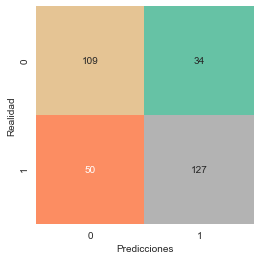

In [364]:
matriz12 = confusion_matrix(y_test, modelo12_pred)
sns.heatmap(matriz12.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [365]:
print(classification_report(y_test, modelo12_pred))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       159
           1       0.72      0.79      0.75       161

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [366]:
modelo12_pred_proba = modelo12.predict_proba(x_test)

In [367]:
print(roc_auc_score(y_test, modelo12_pred))

0.7371772334856831


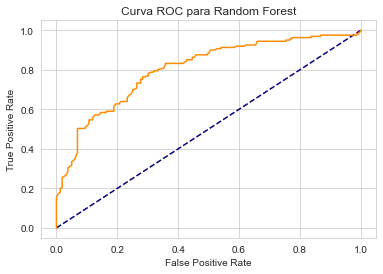

In [368]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo12_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Random Forest')
display()

### Modelo de Random Forest utilizando las variables con mayor relación negativa con quality

In [369]:
variables_negativas = ['volatile acidity', 'total sulfur dioxide','density']

xforest3 = df[variables_negativas]
yforest3 = df['quality']

In [370]:
x_train, x_test, y_train, y_test = train_test_split(xforest3, yforest3, test_size =0.20, random_state = 5)

In [371]:
SC = StandardScaler()

x_train = SC.fit_transform(x_train)
x_test = SC.fit_transform(x_test)

In [372]:
modelo13 = RandomForestClassifier(n_estimators=200)
modelo13.fit(x_train, y_train)
modelo13_pred = modelo13.predict(x_test)

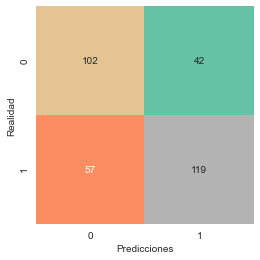

In [373]:
matriz13 = confusion_matrix(y_test, modelo13_pred)
sns.heatmap(matriz13.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [374]:
print(classification_report(y_test, modelo13_pred))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       159
           1       0.68      0.74      0.71       161

    accuracy                           0.69       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.69      0.69      0.69       320



In [375]:
modelo13_pred_proba = modelo13.predict_proba(x_test)

In [376]:
print(roc_auc_score(y_test, modelo13_pred))

0.6903199343724364


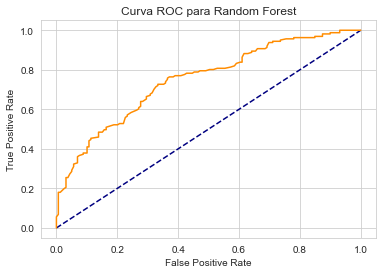

In [377]:
false_prate, true_prate, thresholds = roc_curve(y_test, modelo13_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para Random Forest')
display()

# <font color='crimson'> 4. K-Nearest Neighbors <a id='stemming'></a>

El modelo de clasificación k-NN proviene de la familia de algoritmos de aprendizaje supervisado, cuyo objetivo es
hacer predicciones precisas sobre datos desconocidos después de haber sido entrenado con datos conocidos.


Elegir el valor correcto de K se denomina ajuste de parámetros y es necesario para obtener
mejores resultados.
- K = raíz (número total de puntos de datos)
- Siempre se selecciona un valor impar de K para evitar confusiones entre 2 clases.

K-NN es un algoritmo que se basa en instancias y la distancia entre estas intancias por eso las palabras **nearest neighbors**, esto quiere decir que el algoritmo va a aprender de cada una de estas instancias teniendo en cuenta la distancia de estas entre si y el nievel de parentezco de estas instancias. Este algoritmo sirve tanto para Clasificacion como para Regresion.

Ahora bien, KNN opera a traves de la distancia euclidea. La distancia euclidea para casos bidimensionales (para simplificar) viene a ser el teorema de Pitagoras. La formula de la distancia euclideana es: $ d(x,y) = \sqrt{\sum_{i=1}^{n} (y_{i} - x_{i})^{2}} $  

#### <ins>Ventajas</ins>

- Sin período de training (aprendizaje basado en instancias).
- No hace ningún supuesto por lo que se puede implementar en escenarios no lineales.
- Funciona bien para la clasificación de varias clases.
- Es muy fácil de implementar. Solo se requieren dos parámetros, el valor de K y la función de distancia.

#### <ins>Desventajas</ins>

- Se vuelve muy lento a medida que aumenta el número de puntos de datos porque el modelo necesita almacenarlos todos. No es eficiente en memoria.
- Necesidad de feature scaling: estandarización y normalización antes de aplicar el algoritmo KNN a cualquier conjunto de datos. Si no lo hacemos, puede generar predicciones incorrectas.
- Sensible a missing data y valores atípicos: KNN es sensible al ruido en el conjunto de datos. Necesitamos imputar manualmente los valores perdidos y eliminar los valores atípicos.

In [378]:
from sklearn.neighbors import KNeighborsClassifier

In [379]:
xknn= df.drop('quality', axis = 1)
yknn= df['quality']

x_train, x_test, y_train, y_test = train_test_split(xknn, yknn, test_size =0.20, random_state = 5)

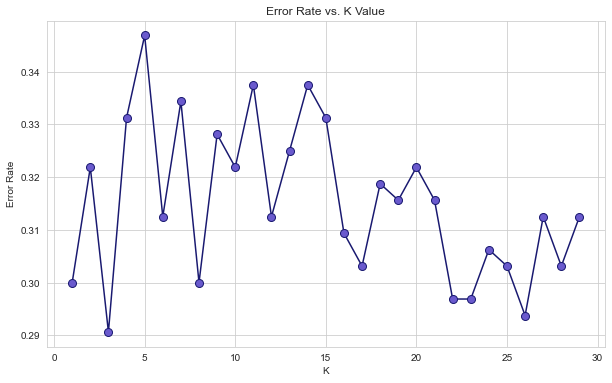

In [380]:
error_rate = []
for i in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), error_rate, color ='midnightblue', marker ='o', markerfacecolor ='slateblue', markersize = 8)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
display()

In [381]:
modeloknn = KNeighborsClassifier(n_neighbors=3)
modeloknn.fit(x_train, y_train)
modeloknn_pred = modeloknn.predict(x_test)

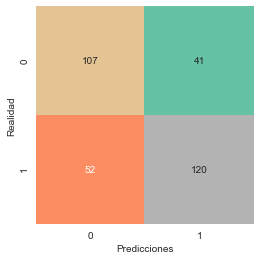

In [382]:
matrizknn = confusion_matrix(y_test, modeloknn_pred)
sns.heatmap(matrizknn.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [383]:
print(classification_report(y_test, modeloknn_pred))

              precision    recall  f1-score   support

           0       0.72      0.67      0.70       159
           1       0.70      0.75      0.72       161

    accuracy                           0.71       320
   macro avg       0.71      0.71      0.71       320
weighted avg       0.71      0.71      0.71       320



In [384]:
modeloknn_pred_proba = modeloknn.predict_proba(x_test)
x_test['probability'] = modeloknn_pred_proba.T[1]

In [385]:
print(roc_auc_score(y_test, modeloknn_pred))

0.7091487948747999


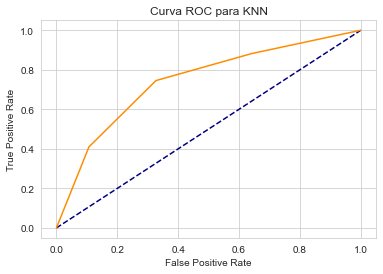

In [386]:
false_prate, true_prate, thresholds = roc_curve(y_test, modeloknn_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNN')
display()

### Modelo de KNN utilizando las variables con mayor relación positiva con quality

In [387]:
variables_positivas = ['alcohol', 'sulphates','citric acid']

xknn2 = df[variables_positivas]
yknn2 = df['quality']

In [388]:
x_train, x_test, y_train, y_test = train_test_split(xknn2, yknn2, test_size =0.20, random_state = 5)

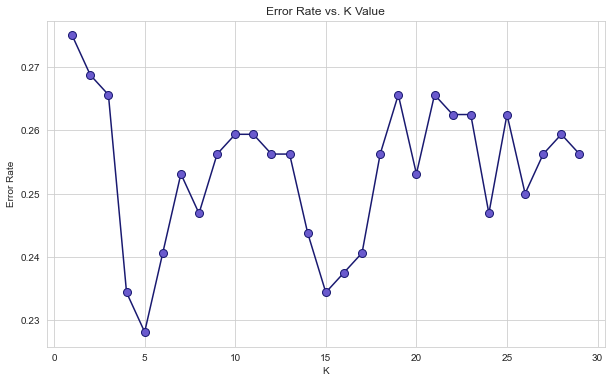

In [389]:
error_rate = []
for i in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), error_rate, color ='midnightblue', marker ='o', markerfacecolor ='slateblue', markersize = 8)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
display()

In [390]:
modeloknn2 = KNeighborsClassifier(n_neighbors=5)
modeloknn2.fit(x_train, y_train)
modeloknn2_pred = modeloknn2.predict(x_test)

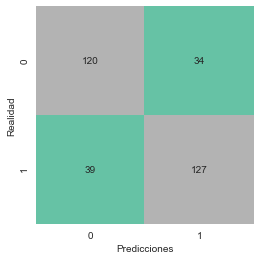

In [391]:
matrizknn2 = confusion_matrix(y_test, modeloknn2_pred)
sns.heatmap(matrizknn2.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [392]:
print(classification_report(y_test, modeloknn2_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       159
           1       0.77      0.79      0.78       161

    accuracy                           0.77       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.77      0.77      0.77       320



In [393]:
modeloknn2_pred_proba = modeloknn2.predict_proba(x_test)
x_test['probability'] = modeloknn2_pred_proba.T[1]

In [394]:
print(roc_auc_score(y_test, modeloknn2_pred))

0.7717684284542367


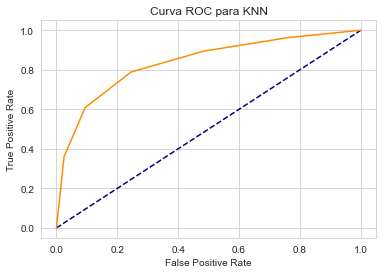

In [395]:
false_prate, true_prate, thresholds = roc_curve(y_test, modeloknn2_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNN')
display()

### Modelo de KNN utilizando las variables con mayor relación negativa con quality

In [396]:
variables_negativas = ['volatile acidity', 'total sulfur dioxide','density']

xknn3 = df[variables_negativas]
yknn3 = df['quality']

In [397]:
x_train, x_test, y_train, y_test = train_test_split(xknn3, yknn3, test_size =0.20, random_state = 5)

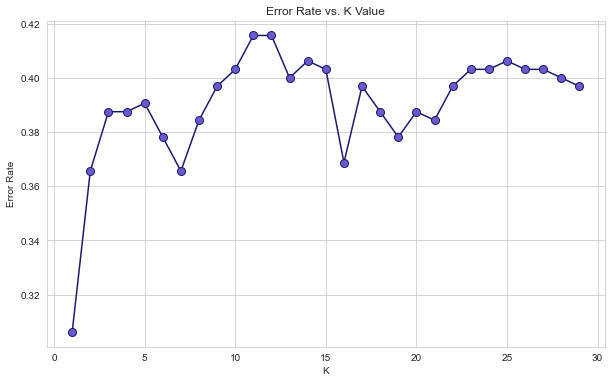

In [398]:
error_rate = []
for i in range(1, 30):

    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 30), error_rate, color ='midnightblue', marker ='o', markerfacecolor ='slateblue', markersize = 8)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
display()

In [399]:
modeloknn3 = KNeighborsClassifier(n_neighbors=1)
modeloknn3.fit(x_train, y_train)
modeloknn3_pred = modeloknn3.predict(x_test)

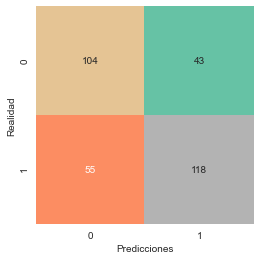

In [400]:
matrizknn3 = confusion_matrix(y_test, modeloknn3_pred)
sns.heatmap(matrizknn3.T, cmap="Set2", square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
display()

In [401]:
print(classification_report(y_test, modeloknn3_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68       159
           1       0.68      0.73      0.71       161

    accuracy                           0.69       320
   macro avg       0.69      0.69      0.69       320
weighted avg       0.69      0.69      0.69       320



In [402]:
modeloknn3_pred_proba = modeloknn3.predict_proba(x_test)
x_test['probability'] = modeloknn3_pred_proba.T[1]

In [403]:
print(roc_auc_score(y_test, modeloknn3_pred))

0.6935036524864253


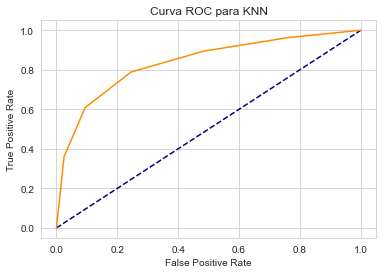

In [404]:
false_prate, true_prate, thresholds = roc_curve(y_test, modeloknn2_pred_proba[:, 1])

plt.plot([0,1],[0,1], color = 'navy', linestyle = '--') 
plt.plot(false_prate, true_prate, color = 'darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC para KNN')
display()

# <font color='crimson'> 5. Comentarios Finales <a id='lemmatisation'></a>

1- La variable objetivo no es muy dispersa, ya que la mayoría de sus valores se concentran en el 5 y 6. Investigando un poco más, sabemos que la variable objetivo va de 1 a 10 pero no ningún valor en los extremos, por lo que podemos afirmar que no hay ningún vino excelente ni muy malo. Las variables de mayor correlación son "Alcohol"(0.48) y "volatile acidity"(-0.39)

2- Decisión sobre los outliers: decidimos no imputar los valores como outliers porque los consideramos como "valid outliers".
Los "valid outliers", o outliers válidos, son datos atipicos que se encuentran dentro del dataset pero que son posibles de obtener y reales. Estos son válidos e importantes para el análisis exploratorio. En muchos casos son una característica diferencial de es una feature en particular.
Cambiar, modificar o imputar estos valores incurriría en la modificación de ciertos estadísticos(por ejemplo la media) dentro del dataset. Estos cambios podrían sesgar negativamente los resultados finales y por ende las conclusiones a las que se llegan.

3- Decisión sobre los duplicados:

4-De los tres modelos trabajados en clase (Naive Bayes, Regresión lineal y Regresión logística) nos dieron métricas más bajas que los dos que agregamos por nuestra cuenta, buscando alternativas con mejores resultados (Random forest y Decision tree).
 1. Comencemos por la Regresion Lineal. En este caso nuestro dataset contiene mas de dos variables, por lo que la Reglesion Lineal va a ser Multiple. Esto quiere decir que se van a utilizar multiples variables independientes que contribuyen a la variable dependiente, este tipo de Regresion Lineal es mas compleja que la Regresion Lineal Simple ya que al utilizarse multiples variables se utiliza una mayor cantidad de coeficientes y es mas dificil ajustar el modelo de la mejor manera posible a los datos y mas facil tener problemas con el modelo como Overfitting o Underfitting. En nuestro caso en particular las metricas de validacion del modelo no fueron muy buenas y podemos afirmar que una de las principales razones por las que nuestro modelo no predice muy bien la realidad es que falto hacer un analisis mas exhaustivo de nuestro dataset y modificarlo de tal manera que solo quedaran o se crearan las variables independientes que mejor puedan contribuir a la variable dependiente. Como analizamos en el notebook en nuestra **Matriz de Correlacion** existen varias variables que aportan mucho valor a nuestra variable dependiente **"quality"** ya que tienen una fuerte correlacion con esta, otras que no tanto y otras que al juntarlas pueden contribuir a la variable **"quality"**. Otra restriccion que tiene la Regresion Lineal es que no se pueden capturar relaciones no lineales sin realizar ajustes, esto quiere decir que si no existe una relacion lineal entre las variables independientes y la variable dependiente el nivel de prediccion del modelo va a ser pobre ya que es una restriccion general de este tipo de modelo predictivo, es por esta razon que si bien el modelo de Regresion Lineal es "simple" de usar y entender en comparacion con otros modelos en el ambito de Machine Learning, es necesario trabajar duro ajustando el dataset y el modelo.
 2. Regresion Logistica: En este tipo de modelos ya nos encontramos con un limitante para este dataset, ese limitante es que la Regresion Logistica proporciona una salida discreta, por ejemplo SI o NO, a diferencia de la Regresion Lineal que su salida es continua. En nuestro caso nuestra variable objetivo se trata de la calidad del vino y se encuentra expresada en valores que se encuentran entre 1 y 10 **(o 3 y 8 no se que prefieren poner ahi)**. En este caso pensamos por ejemplo en categorizar esta variable en vinos de nivel medio y vinos de nivel alto, por lo que la salida de nuestra variable objetivo vendria a ser discreta, cabe aclarar que nuestra variable objetivo no tiene porque tener dos tipos posibles de salida, sino que puede tener mas, convirtiendose en una Regresion Logistica Multinominal. Otro problema es el nivel de multicolinealidad entre algunas variables independientes de nuestro dataset ya que algunas se encuentran fuertemente relacionadas entre si lo cual deberia de tratarse ya que la Regresion Logistica tiende a funcionar mejor con multicolinealidad baja o nula entre variables independientes.

5-Comparación de métricas

**Regresión Lineal**: El mejor MAE y RMSE fue logrado con el modelo que incluye todas las variables del dataset (**0.467 y 0.605**) contra (0.52 y 0.65 - modelo con variables con mayor correlación positiva) y (0.53 y 0.67  - modelo con variables con mayor correlación negativa)

**Regresión Logística**: En este caso las mejores medidas de precision, recall y f1-score, fueron consecuentes del modelo original, es decir el que no omite ninguna variable (**0.74, 0.73 y 0.74**) contra (0.69, 0.68 y 0.68) y ( 0.67, 0.66 y 0.66).

**Naive Bayes**: En este modelo, las mejores métricas se lograron nuevamente en el modelo que incluye a las variables con mayor correlación positiva  (**0.75, 0.74 y 0.74**) contra (0.74 en las tres utilizadas a lo largo de la notebook) y (0.67, 0.66 y 0.65).

**Decision Tree**: Para este modelo no realizamos comparación alguna. Lo que sí que notamos, fue una pequña mejora en las métricas, comparado con los tres anteriores modelos (**0.77 en las tres utilizadas a lo largo de la notebook**).

**Random Forest**: El modelo con mejores resultados, siempre y cuando consideremos todas las variables arrojó el siguiente resultado (**0.83 en las tres utilizadas a lo largo de la notebook**). 

**KNN**: El modelo con mejores resultados, por segunda vez fue el que sólo incluía las variables con mayor correlación positiva, probablemente a causa del funcionamiento del algoritmo de KNN ya explicado anteriormente (**0.77 en las tres utilizadas a lo largo de la notebook**).

En la gran mayoría de casos, cuatro de ellos, el modelo empeoró en sus resultados, al ir alterando el número de variables a trabajar, sin importar cuan significante sea su correlación con la variable objetivo.